# 6 - MODELIZACIÓN PARA REGRESIÓN CON RIDGECV - V1

## IMPORTAR PAQUETES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import RidgeCV

from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error,mean_squared_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

import cloudpickle

## IMPORTAR LOS DATOS

In [2]:
df = pd.read_pickle('../../02_Datos/03_Trabajo/df_tablon.pickle')
df.head()

,1200,500,504,amc,aspen,audi,benz,brougham,buick,caprice,...,any_modelo_82,origen_1,origen_2,origen_3,cilindros_oe_mms,desplazamiento_yeo_mms,caballos_yeo_mms,peso_yeo_mms,aceleracion_yeo_mms,mpg
0,0,0,0,0,0,0,0,0,1,0,...,0.00,1.00,0.00,0.00,1.00,0.89,0.87,0.76,0.25,15.00
1,0,0,0,1,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,1.00,0.83,0.83,0.70,0.28,16.00
2,0,1,0,0,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,1.00,0.98,0.94,0.88,0.15,15.00
3,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,1.00,1.00,0.98,0.88,0.07,14.00
4,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,1.00,0.99,0.98,0.87,0.04,14.00


### SEPARAR PREDICTARAS Y TARGET

In [3]:
x = df.drop(columns= 'mpg').copy()
y = df.mpg.copy()

## MODELIZAR

### RESERVAR EL DATASET DE VALIDACIÓN

In [4]:
train_x, val_x, train_y, val_y = train_test_split(x,y, test_size=0.3, random_state= 42)

### INSTANCIAR MODELO

In [5]:
lr = RidgeCV(cv=3)

### ENTRENAR MODELO

In [6]:
lr.fit(train_x, train_y)

RidgeCV(cv=3)

In [7]:
modelo = lr.fit(train_x, train_y)

### EVALUAR

#### PREDECIR SOBRE LA VALIDACIÓN

In [8]:
pred = lr.predict(val_x)

In [9]:
mape = mean_absolute_percentage_error(val_y, pred)
mae = mean_absolute_error(val_y,pred)
coef_det = r2_score(val_y,pred)
rmse = mean_squared_error(val_y,pred,squared='False')

print("%mape:", mape)
print("mae:", mae)
print("Coeficiente de determinación:", coef_det)
print("RMSE:", rmse)


%mape: 0.0960508695173175
mae: 2.086277228993048
Coeficiente de determinación: 0.8497084646399332
RMSE: 8.475698591568234


#### Gráfico entre la diferencia entre la validación y el original

In [10]:
test_y = val_y.reset_index().copy()
test_pred = pd.Series(pred).to_frame()
df_pred = pd.concat([test_y,test_pred], axis= 1).sort_values(by='mpg').reset_index()
df_pred.rename(columns = {0:'pred'}, inplace = True)
df_pred = df_pred.drop(columns= ['level_0'])
df_pred['dif'] = abs(df_pred['mpg']-df_pred['pred'])
# Diferencia entre predicción y validación
df_pred.sort_values(by = 'dif', ascending = False)

,index,mpg,pred,dif
47,237,23.70,34.09,10.39
81,271,38.00,28.81,9.19
83,231,43.40,35.45,7.95
36,258,20.20,27.58,7.38
20,259,17.60,23.69,6.09
...,...,...,...,...
16,92,16.00,16.22,0.22
55,97,26.00,26.17,0.17
29,119,19.00,18.89,0.11
37,173,20.50,20.46,0.04


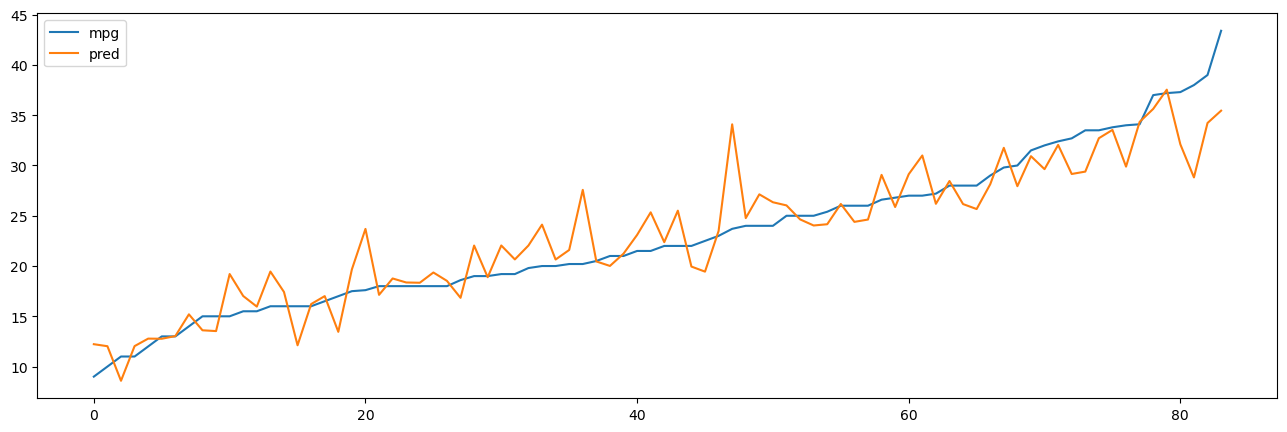

In [11]:
df_pred[['mpg','pred']].plot(figsize=(16,5));

## Gráficios de validación modelos de regresión

1. Gráfico de dispersión de valores reales vs. valores predichos: 

Este gráfico muestra los puntos de datos observados en un diagrama de dispersión, y superpone la línea de regresión que representa la relación lineal ajustada por el modelo. Puedes utilizar este gráfico para evaluar visualmente cómo se ajusta la línea de regresión a los datos observados.

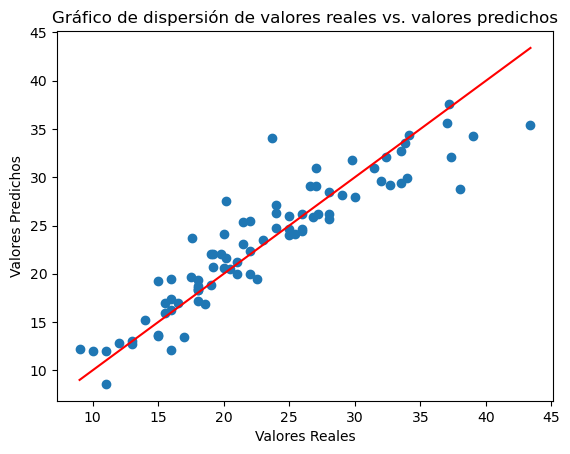

In [12]:
# y = target: Valores reales
# pred - predicción: Valores predichos por el modelo

plt.scatter(val_y, pred)
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red')  # Línea diagonal
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Gráfico de dispersión de valores reales vs. valores predichos')
plt.show()


2. Gráfico de residuos vs. valores predichos: 


Un gráfico de residuos muestra los residuos (diferencias entre los valores observados y los valores predichos por el modelo) en función de los valores ajustados o las variables independientes. Este gráfico puede ayudarte a verificar si los residuos tienen algún patrón sistemático, como una relación no lineal o una heterocedasticidad.

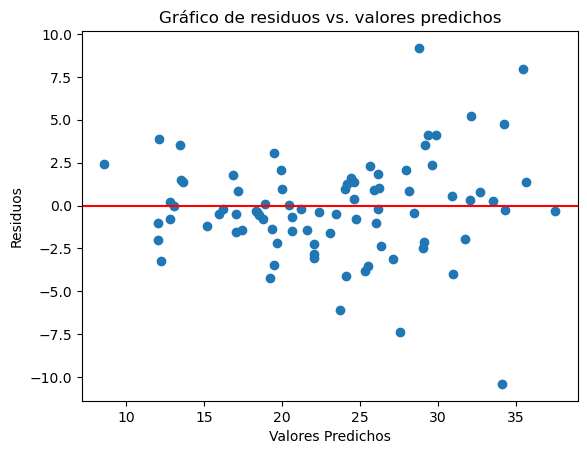

In [13]:
residuos = val_y - pred

plt.scatter(pred, residuos)
plt.axhline(y=0, color='red')  # Línea horizontal en cero
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs. valores predichos')
plt.show()


3. Histograma de residuos:

 Este gráfico muestra la distribución de los residuos del modelo. Puedes utilizar un histograma o un gráfico de densidad para visualizar cómo se distribuyen los residuos y verificar si siguen una distribución aproximadamente normal.

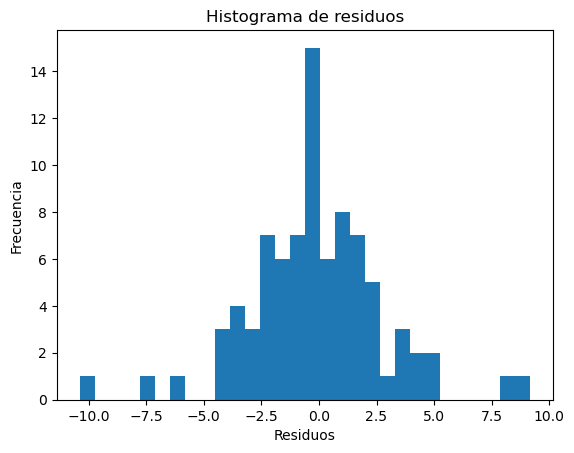

In [14]:
plt.hist(residuos, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de residuos')
plt.show()

4. Gráfico de Q-Q (cuantil-cuantil):

Este gráfico compara los cuantiles de los residuos con los cuantiles esperados de una distribución normal. Puede ayudarte a evaluar si los residuos siguen una distribución normal.

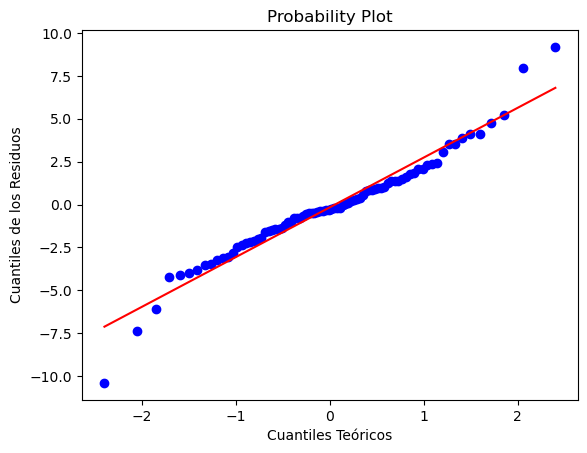

In [15]:
import scipy.stats as stats

residuos = np.asarray(residuos, dtype=float)

stats.probplot(residuos, dist="norm", plot=plt)
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de los Residuos')
plt.show()


5. Gráfico de influencia:

Un gráfico de influencia muestra la influencia de cada observación en el ajuste del modelo. Puede ayudarte a identificar puntos atípicos o valores influyentes que pueden tener un impacto significativo en los resultados de la regresión.

In [16]:
val_y = pd.to_numeric(val_y, errors='coerce')
pred = pd.to_numeric(pred, errors='coerce')

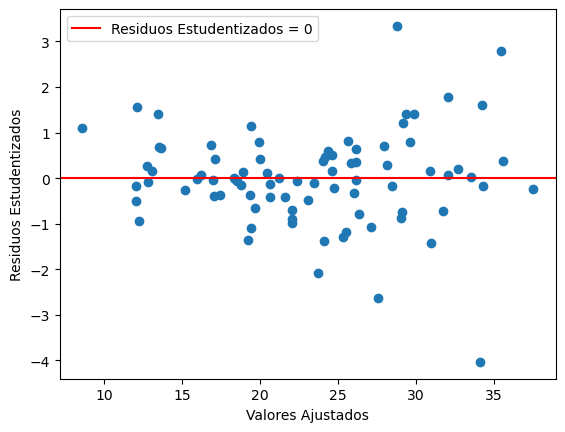

In [17]:
import statsmodels.api as sm

infl = sm.OLS(val_y, sm.add_constant(pred)).fit().get_influence()
residuos_estudentizados = infl.resid_studentized_external

plt.scatter(pred, residuos_estudentizados)
plt.axhline(y=0, color='r', linestyle='-', label='Residuos Estudentizados = 0')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Estudentizados')
plt.legend()
plt.show()

# GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [18]:
m_best_estimator = 'RidgeCV'
version_estimator = '_v1'
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

'RidgeCV_v1.pickle'

In [19]:
m_best_estimator

'RidgeCV'

In [20]:
ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo, file)

### Guardar la información del estimador

In [21]:
# Añadir comentarios sobre el modelo

comentarios ="Modelo Base tras Transformación de datos"


In [22]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : '',
               'm_Best_Score': '', 
               't_%mape': '', 
               't_Coef._determinacion': '', 
               't_mae': '', 
               't_rmse': '', 
               'v_%mape':  mape, 
               'v_Coef._determinacion': coef_det, 
               'v_mae': mae, 
               'v_rmse': rmse,
               'comentarios': comentarios,
               'predictoras_X': '',
               'target_y': ''
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator                                          RidgeCV
m_Best_paramans                                                  
m_Best_Score                                                     
t_%mape                                                          
t_Coef._determinacion                                            
t_mae                                                            
t_rmse                                                           
v_%mape                                                      0.10
v_Coef._determinacion                                        0.85
v_mae                                                        2.09
v_rmse                                                       8.48
comentarios              Modelo Base tras Transformación de datos
predictoras_X                                                    
target_y                                                         
Name: RidgeCV_v1.pickle, dtype: object

In [23]:
df_best = pd.read_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx',index_col=0)


In [24]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx')

Los resultados del modelo son buenos con un 85% de determinación.l Mejorando las métricas de evaluación.

**PRÓXIMOS PASOS:** 

- Transformación de las variables --> Escalado y normalizar los datos
- Preselección de variables
- Lazy Predict para poner a competir a diferentes modelos.
